# WeatherPy



In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#verify that weather api key was imported
weather_api_key

'7961218138873b4ab5ae7233425f7eaa'

### Generate the Cities List by Using the `citipy` Library

In [70]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


In [71]:
#set units 
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | houghton
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | severo-yeniseyskiy
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | noosa heads
Processing Record 6 of Set 1 | banda aceh
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | kalamata
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | jose pedro varela
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | djambala
Processing Record 20 of Set 1 | poronaysk
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | vega de alatorr

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [76]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,houghton,47.1219,-88.5690,3.95,81,84,4.60,US,1712329671
1,adamstown,-25.0660,-130.1015,22.04,62,92,3.55,PN,1712329496
2,severo-yeniseyskiy,60.3725,93.0408,-3.30,98,100,1.24,RU,1712329567
3,grytviken,-54.2811,-36.5092,2.88,89,100,1.82,GS,1712329702
4,noosa heads,-26.3833,153.1500,21.73,80,34,1.32,AU,1712329433


In [77]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [78]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,houghton,47.1219,-88.5690,3.95,81,84,4.60,US,1712329671
1,adamstown,-25.0660,-130.1015,22.04,62,92,3.55,PN,1712329496
2,severo-yeniseyskiy,60.3725,93.0408,-3.30,98,100,1.24,RU,1712329567
3,grytviken,-54.2811,-36.5092,2.88,89,100,1.82,GS,1712329702
4,noosa heads,-26.3833,153.1500,21.73,80,34,1.32,AU,1712329433


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

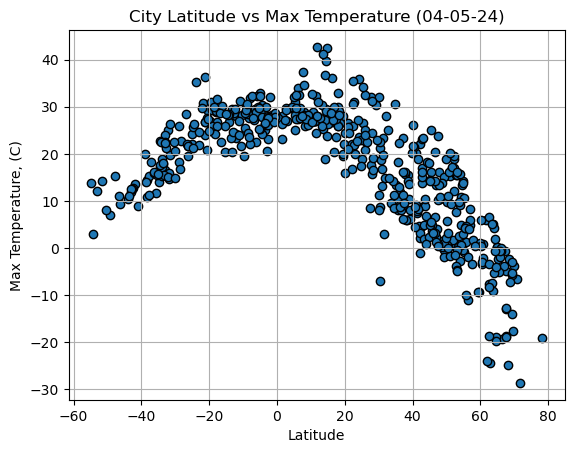

In [79]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 1, edgecolors = "k")

# setting date to show on plot - date will be when the code is run (current date)
date = datetime.datetime.now()
date = date.strftime("%m-%d-%y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature, (C)")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

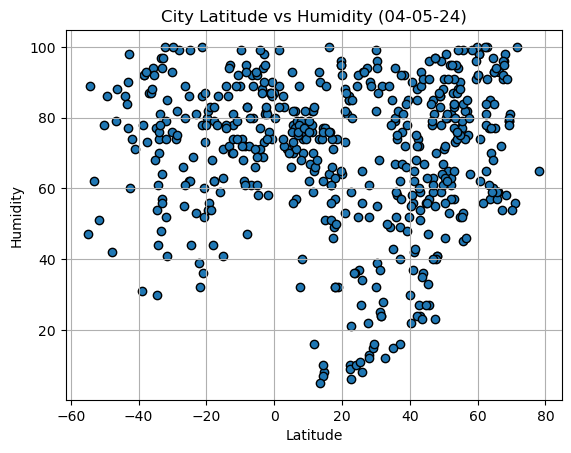

In [80]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 1, edgecolors = "k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity ({date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

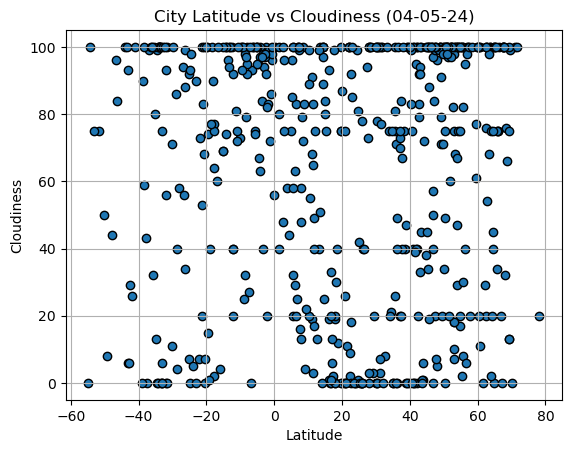

In [81]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 1, edgecolors = "k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

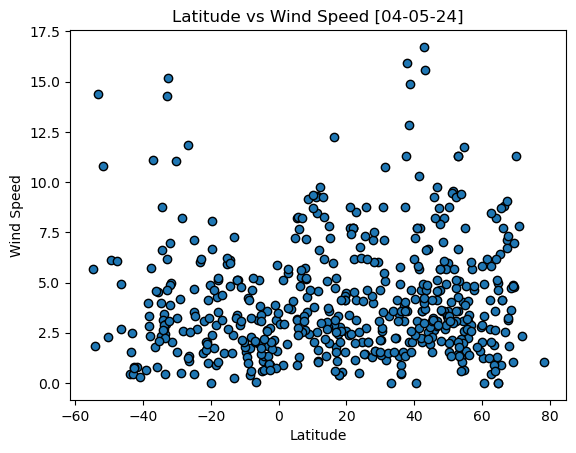

In [82]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 1, edgecolors = "k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed [{date}]")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,houghton,47.1219,-88.5690,3.95,81,84,4.60,US,1712329671
2,severo-yeniseyskiy,60.3725,93.0408,-3.30,98,100,1.24,RU,1712329567
5,banda aceh,5.5577,95.3222,27.68,78,32,3.17,ID,1712329702
6,iskateley,67.6803,53.1512,-12.84,96,100,3.13,RU,1712329702
8,kalamata,37.0389,22.1142,23.39,40,20,3.09,GR,1712329703


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) <=0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.04,62,92,3.55,PN,1712329496
3,grytviken,-54.2811,-36.5092,2.88,89,100,1.82,GS,1712329702
4,noosa heads,-26.3833,153.1500,21.73,80,34,1.32,AU,1712329433
7,waitangi,-43.9535,-176.5597,10.46,86,100,0.45,NZ,1712329702
9,ancud,-41.8697,-73.8203,13.63,74,26,0.80,CL,1712329683


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8578352574749186


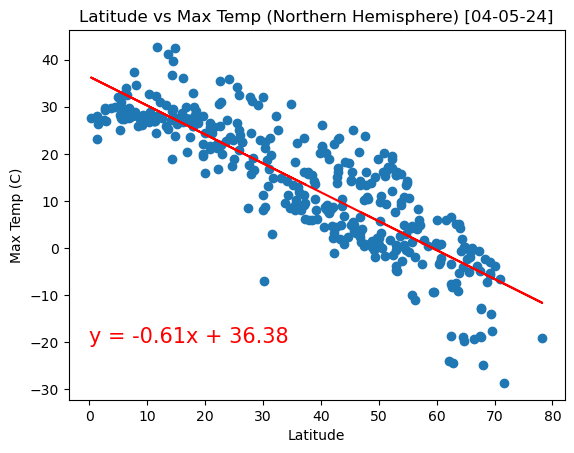

In [105]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Latitude vs Max Temp (Northern Hemisphere) [{date}]")
print(f'The r-value is {rvalue}')

the r-value is 0.8016637107869602


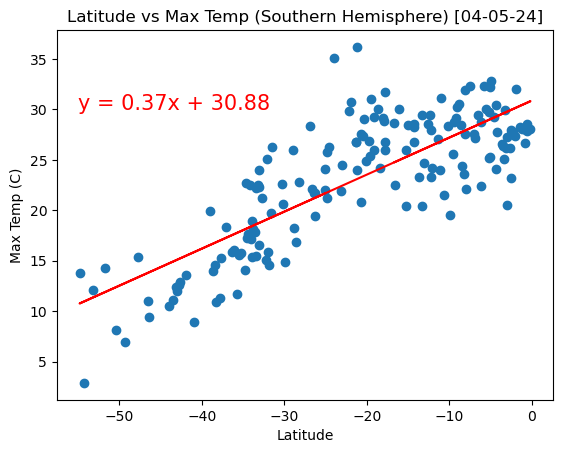

In [106]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Latitude vs Max Temp (Southern Hemisphere) [{date}]")
print(f"The r-value is {rvalue}")

## Discussion about the linear relationship:
For the northern hemisphere, the maximum temperature decreases as the latitude increases. This confirms what we observe ; namely that the further north (higher latitude) you go, the colder the temperatures tend to be. For the southern hemisphere, the temperature increases as you move towards 0 degrees Latitude. Again, this confirms what we see...that the closer to the equator you go, the higher the temperature tends to be. 

In both hemispheres, we can see from the regression that temperatures are warmer the closer you get to 0 degrees Latitude, which is the equator. The high positive r value in the northern hemisphere, and high negative r value in the southern hemisphere also confirm these observations.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.17280621099191343


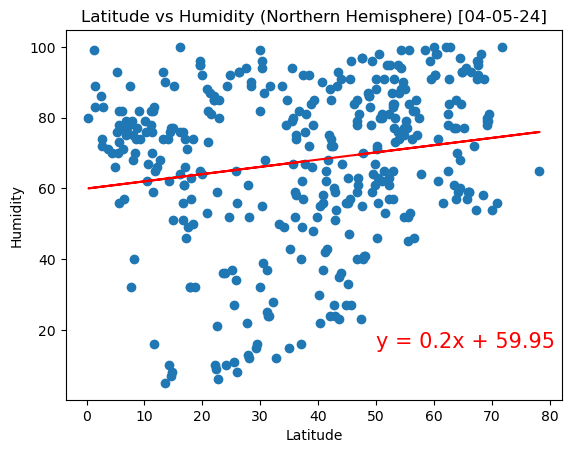

In [107]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity (Northern Hemisphere) [{date}]")
print(f'The r-value is {rvalue}')

the r-value is 0.1346594212059482


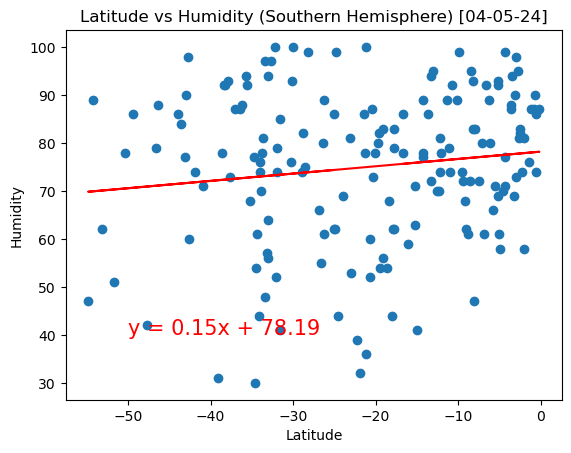

In [109]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity (Southern Hemisphere) [{date}]")
print(f"The r-value is {rvalue}")

# Discussion about the linear relationship:

Unlike the plots and regression model we saw in plotting temperature vs. Latitude, there is much less of a correlation between latitude and humidity in both hemispheres. Both r values are much closer to 0, confirming this. In addition, humidty rises as temperature get lower in the norther hemisphere, however slightly, while humidity 'decreases' the further away you are from the equator in the southern hemisphere. Whatever variation exists, it is probably due to something seasonal and not an overall trend like we saw with temperature vs latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.15749659274335548


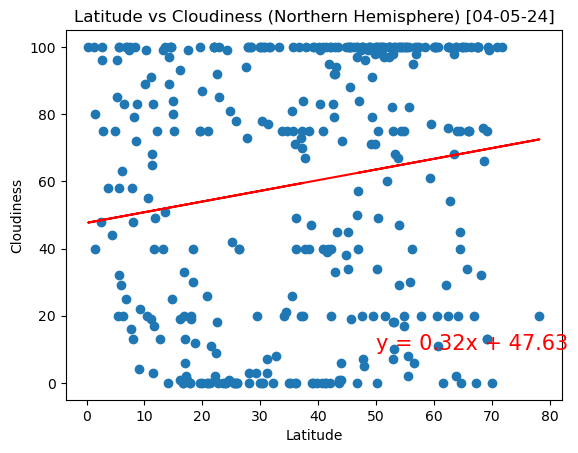

In [110]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness (Northern Hemisphere) [{date}]")
print(f'The r-value is {rvalue}')

the r-value is 0.26447836160464044


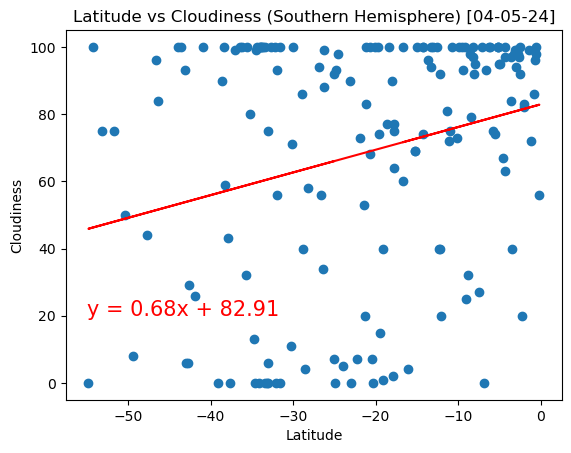

In [111]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness (Southern Hemisphere) [{date}]")
print(f"The r-value is {rvalue}")

# Discussion about the linear relationship:

In regards to the relationship between cloudiness and latitude, we see a slight correlation in the southern hemisphere with wind speed increasing as you get closer to 0 degrees latitude (the equator). In the northern hemisphere, the correlation is less, with wind speeds increasing the further 'away' you get from the equator. Both r values are small, which means we should probably take these measures on other dates to see whether the correlations are seasonal, or even just a fluke on a given day. Given that cloudiness is also a requirement for rain to fall, we can also use the cloudiness metric as a guide to tell us where more rain is to be expected. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.011104696329765967


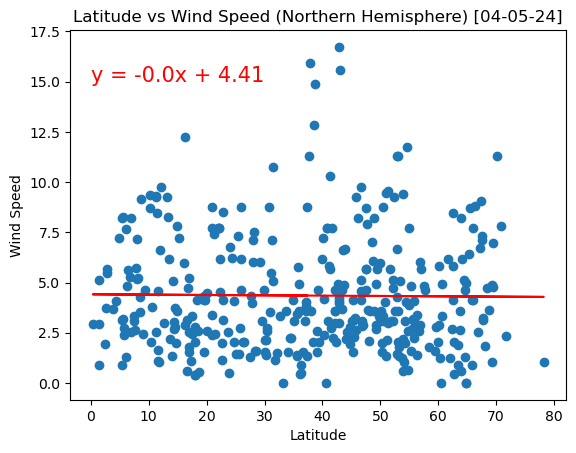

In [112]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed (Northern Hemisphere) [{date}]")
print(f'The r-value is {rvalue}')

the r-value is -0.263123006334889


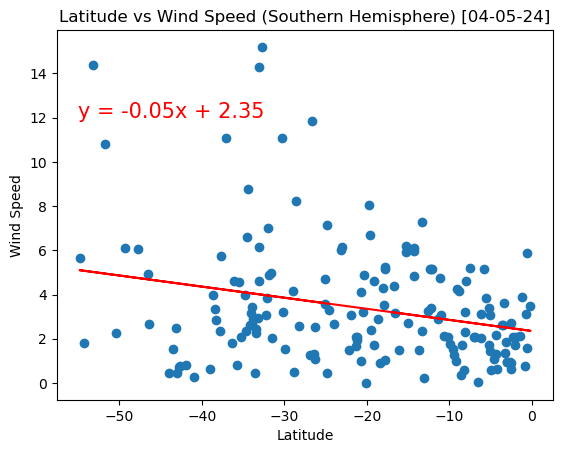

In [113]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed (Southern Hemisphere) [{date}]")
print(f"the r-value is {rvalue}")

# Discussion about the linear relationship:  

In the northern hemisphere, we see almost no correlation between wind speed and latitude. The regression line is almost completely flat. The r value in the north is a miniscule number in these data. In the southern hemisphere, we see a slight decrease in wind speed as one nears the equator. Here, the correlation is a bit more pronounced, though still low, much lower than the correlation between temperature and latitude.